## CSCI 470 Activities and Case Studies

1. For all activities, you are allowed to collaborate with a partner. 
1. For case studies, you should work individually and are **not** allowed to collaborate.

By filling out this notebook and submitting it, you acknowledge that you are aware of the above policies and are agreeing to comply with them.

Some considerations with regard to how these notebooks will be graded:

1. You can add more notebook cells or edit existing notebook cells other than "# YOUR CODE HERE" to test out or debug your code. We actually highly recommend you do so to gain a better understanding of what is happening. However, during grading, **these changes are ignored**. 
2. You must ensure that all your code for the particular task is available in the cells that say "# YOUR CODE HERE"
3. Every cell that says "# YOUR CODE HERE" is followed by a "raise NotImplementedError". You need to remove that line. During grading, if an error occurs then you will not receive points for your work in that section.
4. If your code passes the "assert" statements, then no output will result. If your code fails the "assert" statements, you will get an "AssertionError". Getting an assertion error means you will not receive points for that particular task.
5. If you edit the "assert" statements to make your code pass, they will still fail when they are graded since the "assert" statements will revert to the original. Make sure you don't edit the assert statements.
6. We may sometimes have "hidden" tests for grading. This means that passing the visible "assert" statements is not sufficient. The "assert" statements are there as a guide but you need to make sure you understand what you're required to do and ensure that you are doing it correctly. Passing the visible tests is necessary but not sufficient to get the grade for that cell.
7. When you are asked to define a function, make sure you **don't** use any variables outside of the parameters passed to the function. You can think of the parameters being passed to the function as a hint. Make sure you're using all of those variables.
8. Finally, **make sure you run "Kernel > Restart and Run All"** and pass all the asserts before submitting. If you don't restart the kernel, there may be some code that you ran and deleted that is still being used and that was why your asserts were passing.

# Model Interpretability

In this exercise you'll use the [alibi](https://docs.seldon.io/projects/alibi/en/stable/) library to explain why some models make the predictions they do.

In [21]:
! pip install alibi

     |████████████████████████████████| 235kB 10.3MB/s 
     |████████████████████████████████| 327kB 8.9MB/s 
     |████████████████████████████████| 28.0MB 159kB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463891 sha256=95bd871b0228221fc1a924bd80fac2ae21c18f7d6a0e649fa645a3b600347699
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
  Created wheel for spacy-lookups-data: filename=spacy_lookups_data-0.1.0-py2.py3-none-any.whl size=28052144 sha256=6b1b9dc1134b9362a83a2a7f5651c2e23c0cef7d071bdefbbde8c33edaf2427f
  Stored in directory: /root/.cache/pip/wheels/2a/2b/0a/d6fb6235c56d014d224bca760d15d7cbdd820813085ffcd35d
Successfully built shap spacy-lookups-data


In [2]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
data = load_iris()

In [4]:
print(data["DESCR"])
features = data["data"]
targets = data["target"]

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=0)

In [6]:
print(len(X_test))

38


In [13]:
## Create 2 classifiers: rf_clf that is a Random Forest model, and svm_clf that is a Linear SVM model
## Train them both on the training data
## Use them to predict the test data - saving it to y_rf_pred and y_svm_pred respectively
## You may consider using GridSearchCV to determine a hyperparameter search for both models.
rf_param = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_clf = RandomForestClassifier(n_jobs=-1,max_features= 'auto' ,n_estimators=200, oob_score = True)
rf_clf.fit(X_train,y_train)

svm_clf = LinearSVC()
svm_clf.fit(X_train,y_train)

y_rf_pred = rf_clf.predict(X_test)
y_svm_pred = svm_clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [14]:
assert len(y_rf_pred) == 38
assert isinstance(rf_clf, RandomForestClassifier) or isinstance(rf_clf, GridSearchCV)
assert len(y_svm_pred) == 38
assert isinstance(svm_clf, LinearSVC) or isinstance(svm_clf, GridSearchCV)

In [15]:
print(f"The random forest model achieved an accuracy of {accuracy_score(y_test, y_rf_pred)}.")
print(f"The support vector machine model achieved an accuracy of {accuracy_score(y_test, y_svm_pred)}.")

The random forest model achieved an accuracy of 0.9736842105263158.
The support vector machine model achieved an accuracy of 0.9210526315789473.


In [16]:
# Since we used a Linear SVM, we can easily determine the coefficients for the features:
if isinstance(svm_clf, LinearSVC):
    print(svm_clf.coef_)
elif isinstance(svm_clf, GridSearchCV):
    print(svm_clf.best_estimator_.coef_)

print("Each class gets a coefficient for each feature that helps us determine that feature's importance.")

[[ 0.21778416  0.39842162 -0.83300797 -0.41992672]
 [ 0.02073497 -0.79388423  0.40040623 -0.92633246]
 [-1.08571571 -0.78185112  1.61136988  1.50149575]]
Each class gets a coefficient for each feature that helps us determine that feature's importance.


Now let's look at how we can use explainers, namely the [AnchorTabular](https://docs.seldon.io/projects/alibi/en/stable/methods/Anchors.html#id3) explainer to understand why the models make the predictions they do.

In [22]:
from alibi.explainers import AnchorTabular

Alibi explainers follow a general structure of:

1. Initialize the explainer, providing a prediction function, and explainer specific parameters. `exp = Explainer(predict_func, param_1, param_2, ...)`
1. Fit the explainer to the training data (this step is explainer dependent) `exp.fit(train_data)`
1. Explain a given sample `exp.explain(sample)`

First, we reframe the prediction pipeline into a prediction function that we can use with the explainer:

In [23]:
rf_clf_func = lambda x: rf_clf.predict(x)
svm_clf_func = lambda x: svm_clf.predict(x)

Now we can instantiate the explainer using the prediction function and any parameters the explainer requires:

In [24]:
rf_explainer = AnchorTabular(rf_clf_func, data["feature_names"])
rf_explainer.fit(X_train)

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'disc_perc': (25, 50, 75), 'seed': None}}
)

In [25]:
svm_explainer = AnchorTabular(svm_clf_func, data["feature_names"])
svm_explainer.fit(X_train)

AnchorTabular(meta={
  'name': 'AnchorTabular',
  'type': ['blackbox'],
  'explanations': ['local'],
  'params': {'disc_perc': (25, 50, 75), 'seed': None}}
)

Once the explainer is set up, we can now use it to `.explain` samples! Pick a sample below to explain the two models' predictions.

In [26]:
# Change this value to choose a test sample
index_to_explain = 7


rf_explanation = rf_explainer.explain(X_test[index_to_explain])
svm_explanation = svm_explainer.explain(X_test[index_to_explain])

Could not find an result satisfying the 0.95 precision constraint. Now returning the best non-eligible result.
Could not find an result satisfying the 0.95 precision constraint. Now returning the best non-eligible result.


In [27]:
rf_explanation.anchor, rf_explanation.precision

(['1.58 < petal length (cm) <= 5.20',
  '0.30 < petal width (cm) <= 1.90',
  'sepal length (cm) > 6.50',
  'sepal width (cm) > 3.00'],
 0.7628657921291625)

In [28]:
svm_explanation.anchor, svm_explanation.precision

(['petal width (cm) <= 1.90',
  '4.25 < petal length (cm) <= 5.20',
  'sepal length (cm) > 6.50',
  '3.00 < sepal width (cm) <= 3.30'],
 0.9412997903563941)

Here we can see what the model's explanation for the classification of that sample is. You can see that even with our relatively interpretable model of Linear SVMs, these explainers can provide a more direct and intuitive explanation for why a sample was labeled the way it was.

Now that you've seen the general approach for these explainers, let's work on something a bit more complex. Now you'll have to create the models, the prediction function, and the explainers.

## Explaining MNIST predictions

Explaining data from measured observations is simple enough. Now let's try explaining how images get labeled.

In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [30]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [31]:
sample_index = 12
sample = x_train[sample_index]

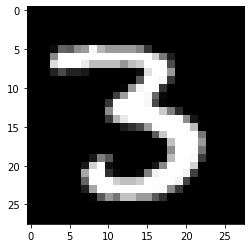

In [32]:
plt.imshow(sample, cmap="gray")

In [39]:
## Create a neural network model that should do well on the MNIST dataset and save it to mnist_nn
## Make the neural network sufficiently complex (at least 5 layers) and feel free to use Conv2D layers for example

## Save the neural network to mnist_nn
## You'll need to make sure you get at least 80% accuracy

mnist_nn = Sequential()
mnist_nn.add(Conv2D(32,(3,3),activation='relu', input_shape=(28, 28, 1)))
mnist_nn.add(Conv2D(64, (3, 3), activation='relu'))
mnist_nn.add(MaxPool2D((2, 2)))
mnist_nn.add(Dropout(.25))
mnist_nn.add(Flatten())
mnist_nn.add(Dense(128, activation='relu'))
mnist_nn.add(Dropout(.5))
mnist_nn.add(Dense(10, activation='softmax'))

mnist_nn.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mnist_nn.fit(x_train.reshape(-1, 28, 28 ,1), y_train, epochs=1)
mnist_nn.summary()

1875/1875 [==============================] - 142s 76ms/step - loss: 0.4577 - accuracy: 0.8990
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               1179776   
__________________________

In [40]:
assert len(mnist_nn.layers) > 5
assert mnist_nn.evaluate(x_test.reshape(-1, 28, 28 ,1), y_test)[1] > 0.8

313/313 [==============================] - 5s 17ms/step - loss: 0.0727 - accuracy: 0.9766


In [41]:
from alibi.explainers import AnchorImage

To work with images, we'll use the [AnchorImage](https://docs.seldon.io/projects/alibi/en/stable/methods/Anchors.html#id5) explainer. This explainer requires that we break up the image into "superpixels". We'll use the function in the next cell to do just that. 

In [42]:
def superpixel(image, size=(4, 4)):
    segments = np.zeros([image.shape[0], image.shape[1]])
    row_idx, col_idx = np.where(segments == 0)
    for i, j in zip(row_idx, col_idx):
        segments[i, j] = int((image.shape[1]/size[1]) * (i//size[0]) + j//size[1])
    return segments

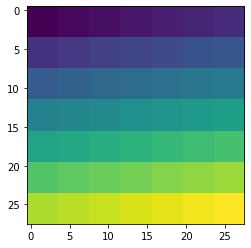

In [43]:
segments = superpixel(x_train[0])
plt.imshow(segments)

Each presented square is a superpixel. You can change the code above to test out other ways of determining superpixels. You could even just simply change the size from 4,4 to a different size and see what happens.

In [44]:
# Create an explainer object using AnchorImage that explains the mnist_nn model you created.
# Make sure to use the superpixel function as the segmentation function 

mnist_explainer = AnchorImage(mnist_nn,(28, 28),superpixel)

In [45]:
assert isinstance(mnist_explainer, AnchorImage)

In [46]:
# Change this number and try out different samples
image_index_to_explain = 2
image_to_explain = x_test.reshape(-1, 28, 28 ,1)[image_index_to_explain]

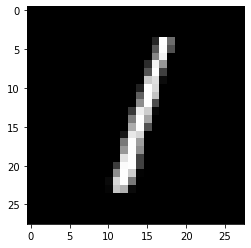

In [47]:
plt.imshow(image_to_explain[:,:,0], cmap="gray")

In [49]:
# Change the value of p_sample, and threshold here to see how the explanation changes based on the sample.
mnist_image_explanation = mnist_explainer.explain(image_to_explain, threshold=.9, p_sample=.5)

The model predicted the number as a 1 because of:


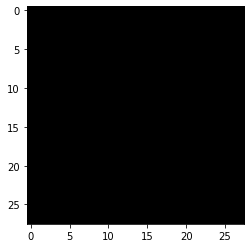

In [50]:
print(f"The model predicted the number as a {mnist_nn.predict(image_to_explain.reshape(1, 28, 28, 1)).argmax()} because of:")
plt.imshow(mnist_image_explanation.anchor[:,:,0], cmap="gray")

One thing you may have noticed is that the explanations are heavily dependent on the superpixels we identify. Have ideas for a better superpixel definition? Go back and try it!

## Explaining newsgroup predictions

With the newsgroup dataset we'll look at explaining how text gets predicted using [AnchorText](https://docs.seldon.io/projects/alibi/en/v0.2.2/methods/Anchors.html#Initialization).

In [51]:
from sklearn.datasets import fetch_20newsgroups
import spacy
from alibi.explainers import AnchorText
from alibi.utils.download import spacy_model
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
newsgroups = fetch_20newsgroups()

In [53]:
print(newsgroups["DESCR"])
text = newsgroups["data"]
news_labels = newsgroups["target"]
newsgroup_names = newsgroups["target_names"]

text_train, text_test, labels_train, labels_test = train_test_split(text, news_labels, random_state=0)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality 

In [54]:
# Creating a TFIDF vectorizer and Linear SVM classifier to make predictions about the newsgroup dataset

tfidf = TfidfVectorizer()
tfidf.fit(text_train)

clf = LinearSVC()
clf.fit(tfidf.transform(text_train), labels_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [59]:
# Create newsgroup_predictor which is a predictor function to use with an AnchorText predictor using
# the vectorizer and classifier defined in the cell above
# Note that you have to transform the data with the vectorizer and then predict it.
newsgroup_predictor = lambda x: clf.predict(tfidf.transform(x))

In [60]:
assert len(newsgroup_predictor(text_test[:2])) == 2

In [61]:
model = 'en_core_web_md'
spacy_model(model=model)
nlp = spacy.load(model)

In [62]:
# Create the explainer to use
newsgroup_explainer = AnchorText(nlp, newsgroup_predictor)

In [63]:
# Copy the text of an article you find on the internet and save it as article

article = "There’s more to enzyme action than correct folding. Many proteins are chemically modified after being translated on the ribosome: parts of the peptide chain may be crosslinked, and non-amino-acid groups such as porphyrins or metal ions are incorporated. Besides, knowing the structure doesn’t by itself tell you the function. Sometimes this can be deduced by analogy, or rather, homology: proteins with similar folds may have similar functions. But that’s not invariably true: proteins with very similar structures can behave in chemically very different ways, while very different folds can achieve similar transformations. There is no unique structure-function relationship. What’s more, designing a ligand for a protein can be challenging even if you know its structure very accurately, partly because we don’t know all the rules of recognition – some depend, for example, on fine details of solvation at the active site. And for drug discovery the biggest hurdles are typically upstream from the identification of a potential molecular target – not least because it often proves to be the wrong target. In any case, the picture in which protein function is determined by a unique and static crystal structure is known now to be far too simplistic. The dynamics might be crucial. Ligand binding typically involves some flexibility and adaptation at the active site – but more generally, the emerging view of protein function invokes the ensemble of conformations accessible to it: the statistical populations and occupancy times of the different dynamic states it can reach. What’s more, many proteins don’t have well-defined folded conformations at all, but contain ‘intrinsically disordered’, floppy parts of the peptide chain. That’s not nature being sloppy: the disorder and resulting flexibility seems to be functional. AI approaches may well identify which sequences are likely to be disordered, but that alone won’t help to understand their behaviour. Finally, any deep-learning system is only competent within the bounds of its training set. We don’t know the size of the human proteome, but some estimates say that only around 5% of all human proteins have been crystallised and their structure determined. So the training data are likely to be biased towards the structures that are relatively easy to solve. Some researchers think there could be a systematic repertoire of protein structures that we just don’t know about. But such assertions have been contested. Some biochemists pointed out that the accuracy of prediction was not always so impressive and is in general unlikely to be accepted without experimental corroboration from, say, crystallography, NMR studies or cryo-electron microscopy. While the majority of predicted structures were within experimental resolution, one can’t tell a priori which are and which aren’t – so you need experiments to check. Also, it’s still not yet clear that the accuracy meets what’s needed for, say, finding drug candidates that might bind to the protein’s active site to block its function. Others take issue with the notion that the method ‘solves the protein folding problem’ at all. Since the pioneering work of Christian Anfinsen in the 1950s, it has been known that unravelled (denatured) protein molecules may regain their ‘native’ conformation spontaneously, implying that the peptide sequence alone encodes the rules for correct folding. The challenge was to find those rules and predict the folding path. AlphaFold has not done this. It says nothing about the mechanism of folding, but just predicts the structure using standard machine learning. It finds correlations between sequence and structure by being trained on the 170,000 or so known structures in the Protein Data Base: the algorithm doesn’t so much solve the protein-folding problem as evade it. How it ‘reasons’ from sequence to structure remains a black box.If some see this as cheating, that doesn’t much matter for practical purposes. It will surely be valuable to deduce even a good guess at the structure from just the sequence. From that we can often make inferences about the protein’s function and the chemical mechanism of its mode of action. And ‘good enough’ predictions can be a useful starting point for refinement with crystallographic data. "

In [64]:
assert len(article) > 500

In [1]:
# Define article_explanation as the explainer's explanation for the article you provided.

article_explanation = newsgroup_explainer.explain(article)

NameError: ignored

In [ ]:
print(f"The model predicted the article as {newsgroup_names[newsgroup_predictor([article])[0]]} because of the word: {article_explanation.anchor}")

In [ ]:
# Change this number and try out different samples
test_sample_index = 28
test_sample = text_test[test_sample_index]
print(test_sample)

In [ ]:
test_sample_explanation = newsgroup_explainer.explain(test_sample)

In [ ]:
print(f"The model predicted the test sample as {newsgroup_names[newsgroup_predictor([test_sample])[0]]} because of the word {test_sample_explanation.anchor}")

## Feedback

In [ ]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    return "I liked this assignment"

In [ ]:
feedback()